# Assignment 07: Due 10/10

In this assignment we will look at some real data from the CMS experiment at the LHC. The LHC makes a lot of its data publically available here: http://opendata.cern.ch. The information about the data set we will be working with at can be found here: http://opendata.cern.ch/record/545

## Imports 

For this assignemnt you will need the following imports

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method

import scipy.special as sf
%matplotlib notebook

# Problem 1)

Create a Pandas DataFrame object from the data file *Z_ee_Run2011A.csv*, located in the *data* dircetroy, and use the *info* function to list the information from the DataFrame.

In [2]:
df = pd.read_csv('Zee_Run2011A.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           18885 non-null  int64  
 1   Event         18885 non-null  int64  
 2   pt1           18885 non-null  float64
 3   eta1          18885 non-null  float64
 4   phi1          18885 non-null  float64
 5   Q1            18885 non-null  int64  
 6   type1         18885 non-null  object 
 7   sigmaEtaEta1  18885 non-null  float64
 8   HoverE1       18885 non-null  float64
 9   isoTrack1     18885 non-null  float64
 10  isoEcal1      18885 non-null  float64
 11  isoHcal1      18885 non-null  float64
 12  pt2           18885 non-null  float64
 13  eta2          18885 non-null  float64
 14  phi2          18885 non-null  float64
 15  Q2            18885 non-null  int64  
 16  type2         18885 non-null  object 
 17  sigmaEtaEta2  18885 non-null  float64
 18  HoverE2       18885 non-nu

# Problem 2)

Create a new DataFrame column, which lists the value of the reconstructed invariant mass, $m_{inv}$, from the $Z\rightarrow ee$ decay. The invariant mass is given by

$m_{inv} = \sqrt{2 p_{T1} p_{T2} \left(cosh\left(\eta_1 - \eta_2\right) - cos\left(\phi_1 -\phi_2\right) \right)}$

Make a histogram of the invariant mass. Your histogram should look like the one below:

<div>
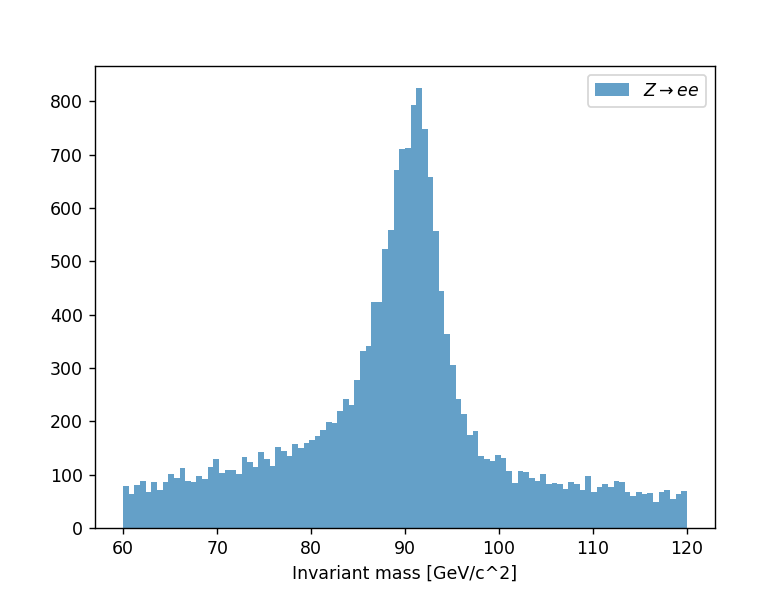
</div>


In [3]:
minv_mu = np.sqrt(2*df.pt1*df.pt2 * (np.cosh(df.eta1 - df.eta2) - np.cos(df.phi1 - df.phi2)))
df['M'] = minv_mu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           18885 non-null  int64  
 1   Event         18885 non-null  int64  
 2   pt1           18885 non-null  float64
 3   eta1          18885 non-null  float64
 4   phi1          18885 non-null  float64
 5   Q1            18885 non-null  int64  
 6   type1         18885 non-null  object 
 7   sigmaEtaEta1  18885 non-null  float64
 8   HoverE1       18885 non-null  float64
 9   isoTrack1     18885 non-null  float64
 10  isoEcal1      18885 non-null  float64
 11  isoHcal1      18885 non-null  float64
 12  pt2           18885 non-null  float64
 13  eta2          18885 non-null  float64
 14  phi2          18885 non-null  float64
 15  Q2            18885 non-null  int64  
 16  type2         18885 non-null  object 
 17  sigmaEtaEta2  18885 non-null  float64
 18  HoverE2       18885 non-nu

<IPython.core.display.Javascript object>


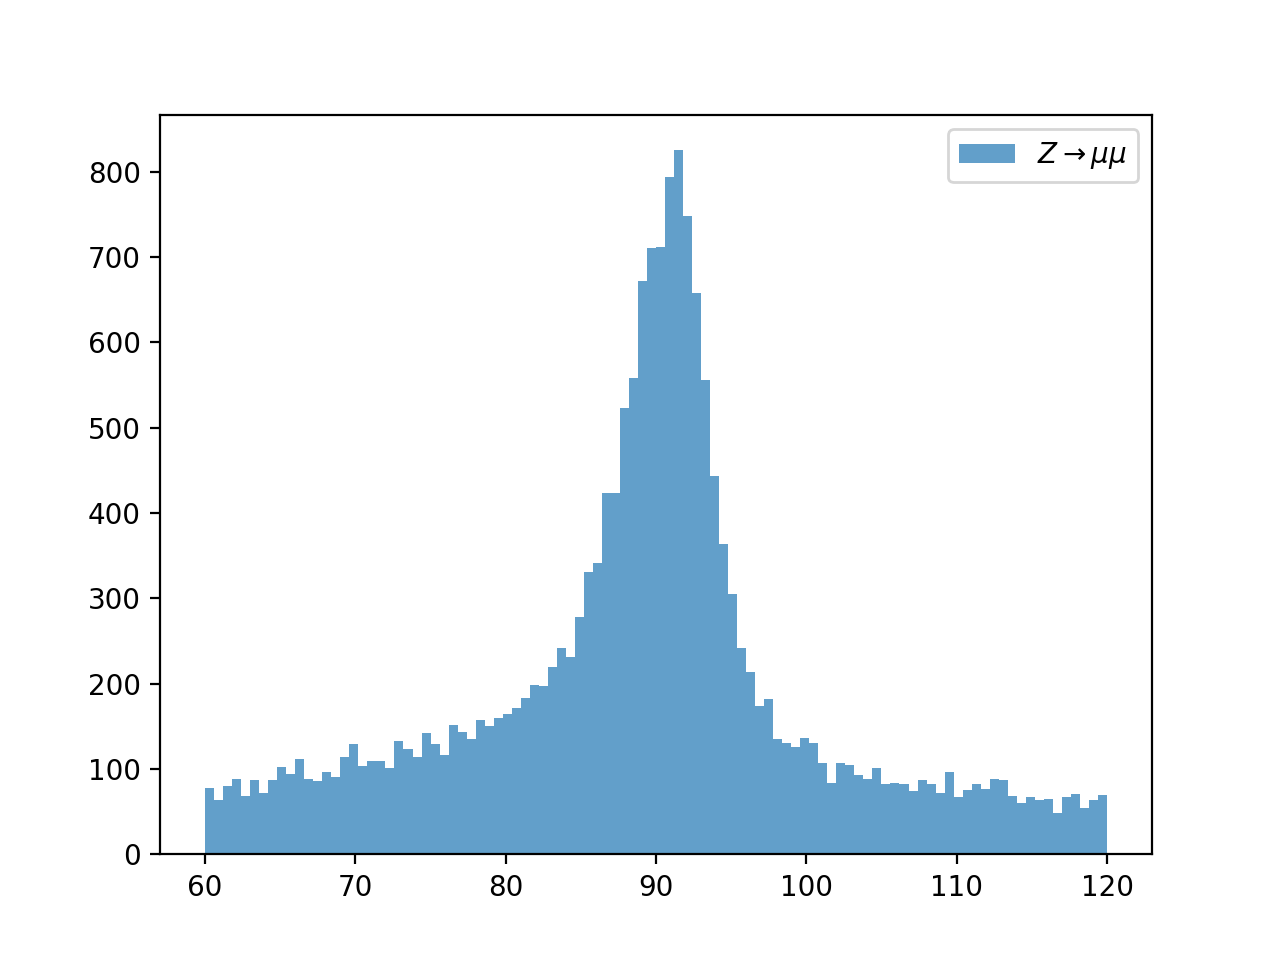

In [4]:
fig = plt.figure()
plt.hist(minv_mu,bins=100,alpha = 0.7, label=r'$Z\rightarrow \mu\mu$')
plt.legend();

# Problem 3)

The Relativistic Breit-Wigner distribution is expected to describe the , which is given as

Wikepedia: https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution

$f(E) = \frac{k}{(E^2 -M^2)^2 + M^2\Gamma^2}$, where

 * $\gamma$ = $\sqrt{M^2(M^2+\Gamma^2)}$
 * $k = \frac{2\sqrt{2}M\Gamma\gamma}{\pi\sqrt{M^2+\gamma}}$
 
 Where $E$ is the energy, $M$ is the mass value where the function will peak. 
 Fit the invariant mass distribution with the function:
 
 $aE + b + cf(E)$,
 
 where $a, b, $ and $c$ are fit parameters to be deterimined by your fit that describe a linear background, and $f(E)$ is the Relativistic Breit-Wigner function described above. To do this you should make a function that takes as agruments: $\Gamma, M, a, b, c$. Where $\Gamma$ and $M$ are contained in the Breit-Wigner function ($f(E)$). Our fit will determine the values $\Gamma, M, a, b, c$. The value of $M = m_{inv}$ and should be near where the distribution peaks.   
 
**Fit the distribution over the range $70 \le M_Z \le 110 \;GeV/c^2 $ and calculate the reduced $\chi^2$. You can use either the *curve_fit* function form Scipy.**

**Q:** How does your invariant mass value compare to the accepted value ($M_Z = 91.1876 GeV/c^2$) of the $Z$ boson mass (you can look it up on Wikipedia)?
 
**Q:** Calculate the reduced $\chi^2$ and p-value of your fit. 

You plot for this problem should look like:
<div>
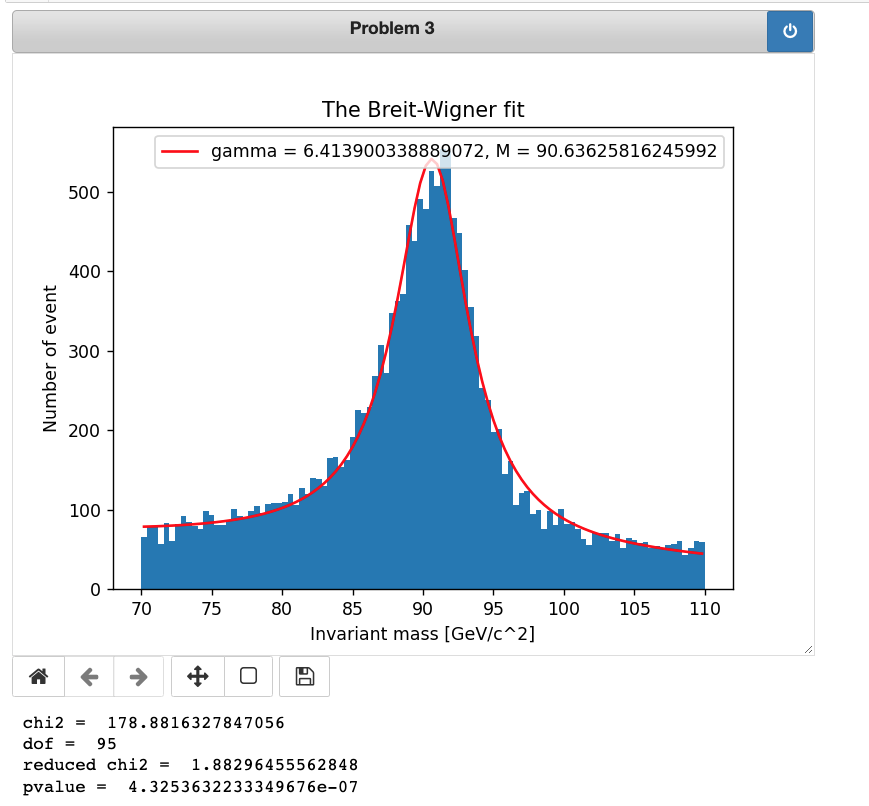
</div>

In [5]:
def breitwigner_rel(E, gamma, M, a, b, A):
    
    little_gamma = np.sqrt( M**2*(M**2 + gamma**2) )
    
    k = 2*np.sqrt(2)*M*gamma*little_gamma/( np.pi*np.sqrt(M**2 + little_gamma) )
    
    return a*E + b + A* (k/ ( (E**2 - M**2)**2 + M**2 * gamma**2) )

<IPython.core.display.Javascript object>


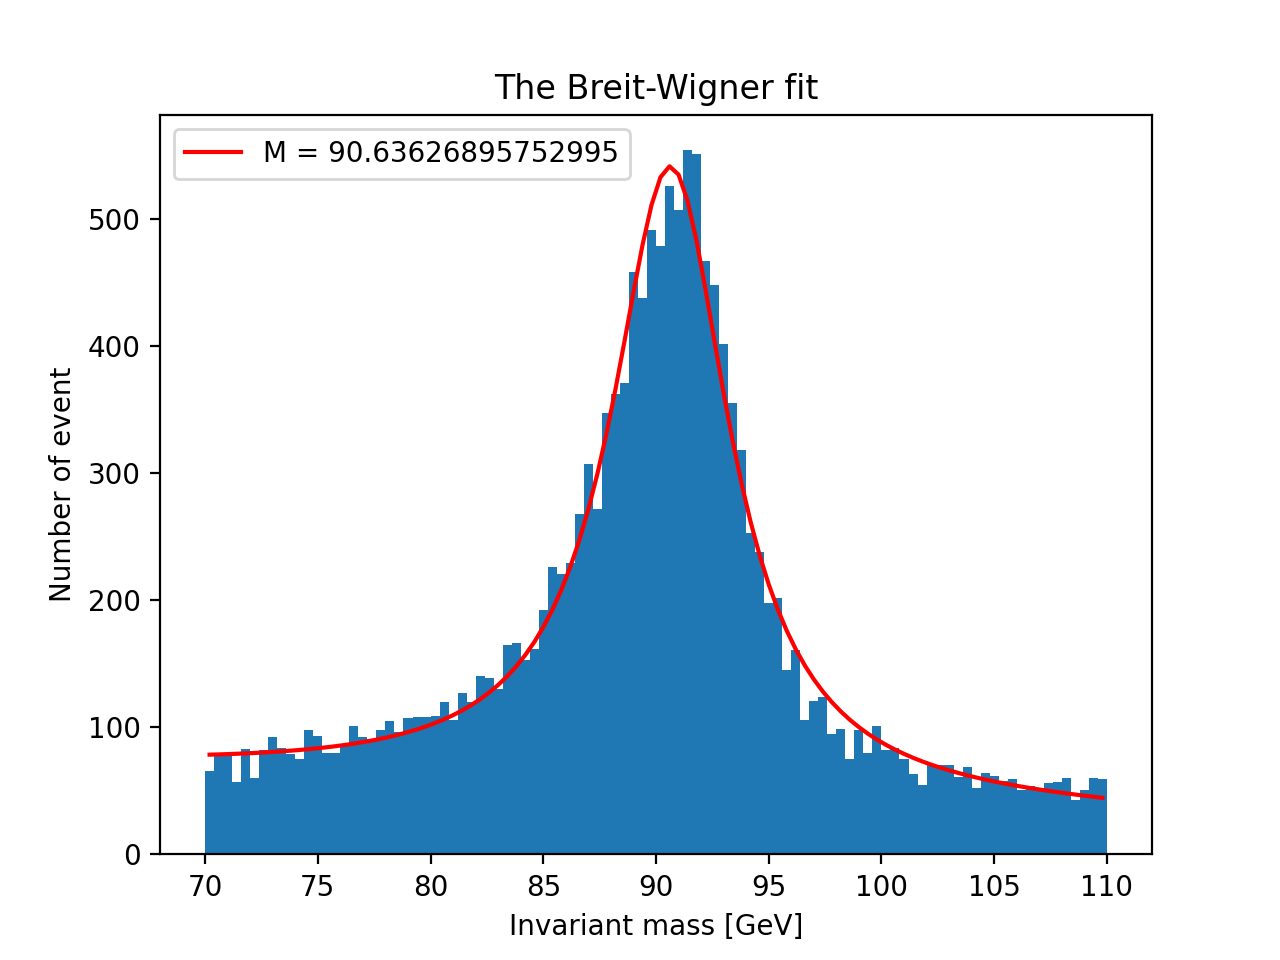

chi2:  178.88163273151926
dof:  95
reduced chi2:  1.8829645550686238
p-value:  4.3253632798373914e-07


In [6]:
l = 70
u = 110 

fig = plt.figure()
histogram_mu = plt.hist(minv_mu, bins=100, range = (l,u))

y_mu = histogram_mu[0]
x_mu = 0.5*(histogram_mu[1][0:-1] + histogram_mu[1][1:])
y_mu_error = np.sqrt(y_mu)
for i in range (len(y_mu)):
    if y_mu_error[i] == 0:
        y_mu_error[i] = 1.0
    else:
        y_mu_error[i] = y_mu_error[i]

initals = [2.5, 91, -2, 200, 13000]
best_mu, covariance_mu = curve_fit(breitwigner_rel, x_mu, y_mu, p0=initals, sigma=y_mu_error)

plt.plot(x_mu, breitwigner_rel(x_mu, *best_mu),'r-',label='M = {}'.format(best_mu[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of event')
plt.title('The Breit-Wigner fit')
plt.legend();

chisq = np.sum( (y_mu - breitwigner_rel(x_mu, *best_mu))**2/y_mu_error**2 )
dof = len(y_mu) - len(best_mu)
pvalue = sf.gammaincc(dof/2.0, chisq/2.0)
print('chi2: ', chisq)
print('dof: ', dof)
print('reduced chi2: ', chisq/dof)
print('p-value: ',pvalue)

# Problem 4)

On the same graph, make histograms of the $\eta_1$ and $\eta_2$ distributions. Be sure to include a legend so the two distributions can be distinquised.

Your plot should look like:
<div>
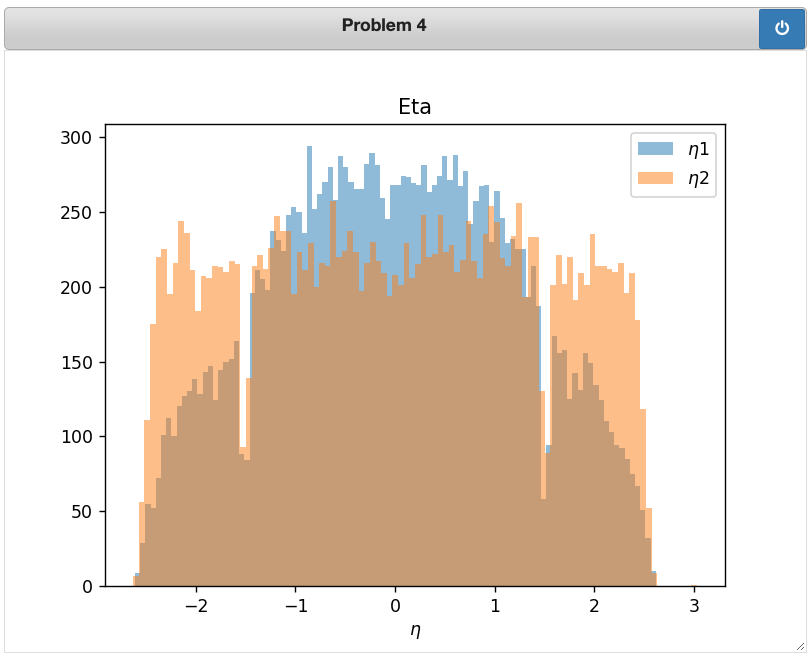
</div>

<IPython.core.display.Javascript object>


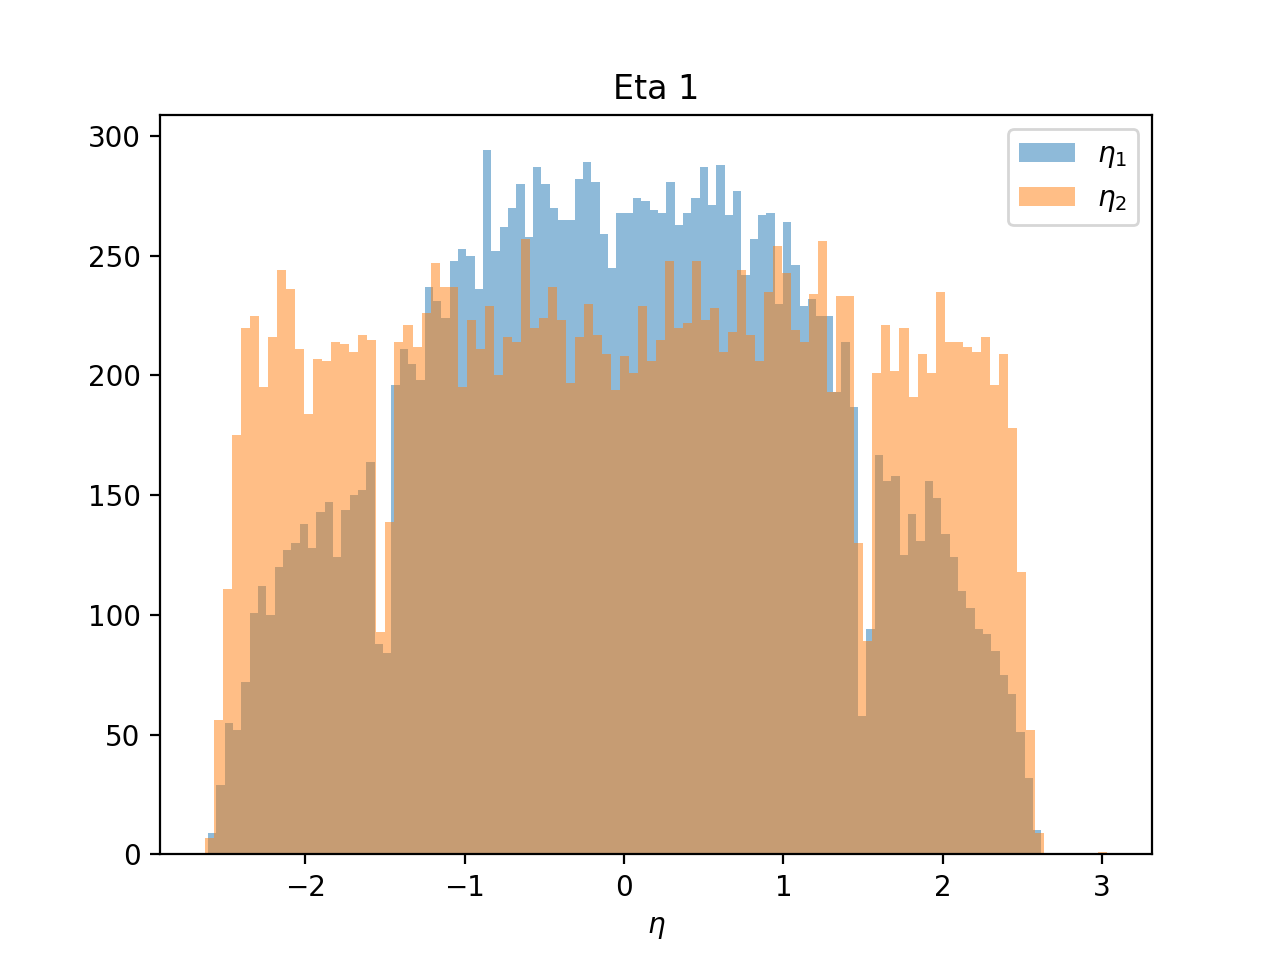

In [7]:
fig = plt.figure('eta')
plt.hist(df.eta1,bins=100,alpha= 0.5,label=r'$\eta_1$')
plt.hist(df.eta2,bins=100,alpha = 0.5,label=r'$\eta_2$')

plt.xlabel(r'$\eta$')
plt.title('Eta 1')
plt.legend();

# Problem 5)

From the distribution above, we clearly see two distinct distributions in the histogram. We can explain this due to the decay being detected in two different detectors, the electromagnetic barrel calorimeter (EB) and the endcap electromagnetic calorimeter (EE). This distinction is made in the column labeled *type1* and *type2*, which tells us which detector particle 1 and particle 2 are detected in. 

Create two DataFrames *barrel* and *endcap*, where *barrel* keeps all of the information in the original DataFrame where both particles were detected in the EB, and *endcap* keeps all of the information in the original DataFrame where both particles were detected in the EE.

Make two sub plots where in sub plot one you histogram the $\eta1$ distribution for the particles in the EB and EE. Then in sub plot two histogram the $\eta2$ distribution for particles detected in the EE and EB. Be sure to include a legend that distiquishes EB from EE events.

Your plot should look like this:
<div>
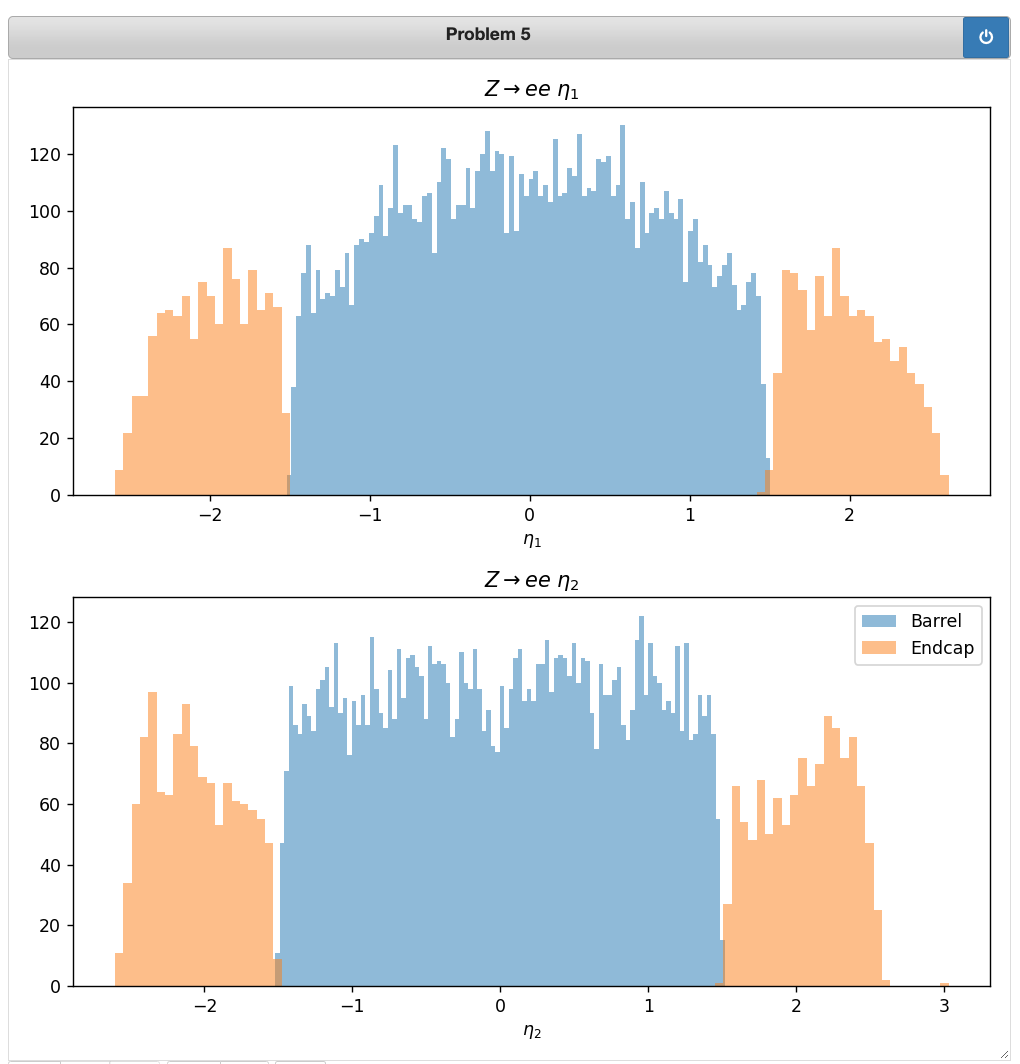
</div>

In [ ]:
df

In [ ]:
barrel = df.copy()

In [ ]:
endcap = df.copy()

In [ ]:
fig, axes = plt.subplots(1, 2)

barrel.hist('rate', bins=100, ax=axes[0])
endcap.hist('rate', bins=100, ax=axes[1])

# Problem 6

With particles being detected in two different detectors, the resolution of the detectors could differ. This could reslt in measureing the boson mass better in one detector than the other.

Using your *barrel* and *endcap* DataFrames from above, on the same graph make a histogram of the invariant mass measured in the barrel and endcap detectors.  

Your plot should look like this:
<div>
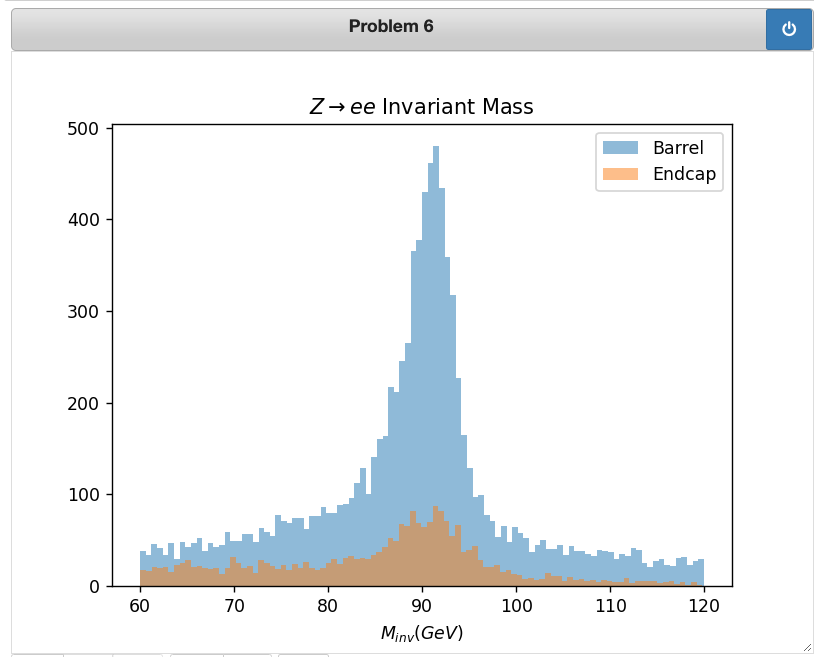
</div>

**Q**: Which region (Barrel or Endcap) gives the better measurement? 

# Problem 7

Seeing that the $Z$ mass distribution is different depending on if it was measured in the endcap or barrel detectors and that there is a gap (inefficency) in the pseudorapidity near $|\eta| = 1.5$, let's fit the barrel and endcap regions seperatly. 

Add a new columns to our DataFrame called M_barrel and M_endcap, where 
* M_barrel is an array that takes all values of invariant mass column defined in Problem 2 whose $\eta$ values satisfy $|\eta_1| < 1.1$ **and** $|\eta_2| < 1.1$  
* M_endcap is an array that takes all values of invariant mass column defined in Problem 2 whose $\eta$ values satisfy $|\eta_1| > 1.7$ **and** $|\eta_2| > 1.7$

This is sometimes reffered to as cutting on a quantity, in this case $\eta_1$ and $\eta_2$.

Plot the histograms of both of these quantities on the same graph. It should look like this:
<div>
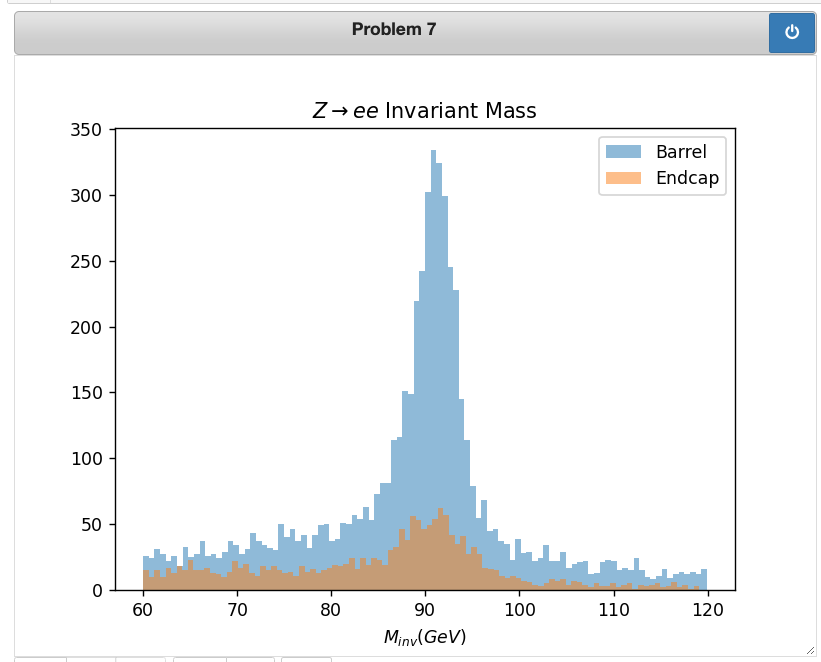
</div>

In [ ]:
df['M_barrel0'] = df[ (df['eta1'] < 1.1) & (df['eta2'] < 1.1)]
df['M_endcap0'] = df[ (df['eta1'] > 1.7) & (df['eta2'] > 1.7)]

# Problem 8

Fit the M_barrel histogram with the relativistic Breit-Wigner function you defined earlier and calculate the reduced $\chi^2$ and p-value for the fit. Draw a plot of the M_barrel histogram with your fit result (e.g. like in Problem 3).

**Q**: Does your fit provide better or worst description of the data compared to what you found in Problem 3?

# Problem 9

Fit the M_endcap histogram with the relativistic Breit-Wigner function you defined earlier and calculate the reduced $\chi^2$ and p-value for the fit. Draw a plot of the M_endcap histogram with your fit result (e.g. like in Problem 3).

**Q**: Does your fit provide better or worst description of the data compared to what you found in Problem 3?

# Problem 10

From your DataFrame (from Problem 2), drop all columns except for pt1, eta1, phi1, pt2, eta2, phi2, and M. 
Using this DataFrame, use the Pandas *corr* function to produce a correlataion table. What quantites have the strongest correlation (that are not 1)?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           18885 non-null  int64  
 1   Event         18885 non-null  int64  
 2   pt1           18885 non-null  float64
 3   eta1          18885 non-null  float64
 4   phi1          18885 non-null  float64
 5   Q1            18885 non-null  int64  
 6   type1         18885 non-null  object 
 7   sigmaEtaEta1  18885 non-null  float64
 8   HoverE1       18885 non-null  float64
 9   isoTrack1     18885 non-null  float64
 10  isoEcal1      18885 non-null  float64
 11  isoHcal1      18885 non-null  float64
 12  pt2           18885 non-null  float64
 13  eta2          18885 non-null  float64
 14  phi2          18885 non-null  float64
 15  Q2            18885 non-null  int64  
 16  type2         18885 non-null  object 
 17  sigmaEtaEta2  18885 non-null  float64
 18  HoverE2       18885 non-nu

In [9]:
df.drop(['Run','Event','Q1','type1','sigmaEtaEta1','HoverE1','isoTrack1','isoEcal1','isoHcal1','Q2','type2','sigmaEtaEta2','HoverE2','isoTrack2','isoEcal2','isoHcal2'],axis=1,inplace=True)

In [10]:
df 

,pt1,eta1,phi1,pt2,eta2,phi2,M
0,37.5667,2.289180,2.052600,45.4315,1.470640,-1.163050,89.589562
1,36.2901,-0.837253,-1.585920,60.5754,-0.489570,1.049600,92.252290
2,25.9705,-0.697420,1.635990,45.2954,-2.040090,3.118750,67.859158
3,41.0075,1.461920,-0.532464,45.9013,1.156060,2.478580,87.604923
4,39.8985,-0.592666,-2.394720,34.8931,-2.244440,0.610610,101.426755
...,...,...,...,...,...,...,...
18880,67.9728,0.591181,2.824340,32.7795,0.566588,0.203395,91.232354
18881,42.8005,-2.291330,0.779165,49.8503,-1.640510,-2.741140,95.750631
18882,25.4359,0.137592,2.641270,50.9959,1.518880,-0.962316,88.378684
18883,51.1762,0.778649,2.683120,30.0143,-0.386661,-0.451479,92.069605
